<a href="https://colab.research.google.com/github/setareh10/Task/blob/main/PyTorch_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
data = load_breast_cancer()
type(data)

data.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
print(f'data siez: {data.data.shape}\n')
print(f'Features Names: {data.feature_names}\n')
print(f'Targets Names: {data.target_names}\n')

data siez: (569, 30)

Features Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Targets Names: ['malignant' 'benign']



In [16]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)



In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
input_train = torch.from_numpy(X_train.astype(np.float32))
target_train = torch.from_numpy(y_train.reshape(y_train.shape[0],1).astype(np.float32))

input_test = torch.from_numpy(X_test.astype(np.float32))
target_test = torch.from_numpy(y_test.reshape(y_test.shape[0],1).astype(np.float32))

N, D = input_train.shape
print( N, D)


381 30


In [44]:
model = nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

n_epochs = 1000

In [45]:
loss_train_list = []
loss_test_list = []

for epoch in range(n_epochs):
    optimizer.zero_grad()

    output_train = model(input_train)
    loss_train = criterion(output_train, target_train)
    loss_train_list.append(loss_train.item())

    loss_train.backward()
    optimizer.step()

    output_test = model(input_test)
    loss_test = criterion(output_test, target_test)
    loss_test_list.append(loss_test.item())

    if (epoch + 1) % 50 == 0:
        print(f'Epoch {epoch + 1}: Loss Train: {loss_train.item()}, Loss Test: {loss_test.item()}')


Epoch 50: Loss Train: 0.41543346643447876, Loss Test: 0.4126209616661072
Epoch 100: Loss Train: 0.3135065734386444, Loss Test: 0.31249281764030457
Epoch 150: Loss Train: 0.2564096450805664, Loss Test: 0.25665175914764404
Epoch 200: Loss Train: 0.21979708969593048, Loss Test: 0.22088947892189026
Epoch 250: Loss Train: 0.19430162012577057, Loss Test: 0.19594210386276245
Epoch 300: Loss Train: 0.17550639808177948, Loss Test: 0.17750269174575806
Epoch 350: Loss Train: 0.16104960441589355, Loss Test: 0.1632867306470871
Epoch 400: Loss Train: 0.14955845475196838, Loss Test: 0.15196821093559265
Epoch 450: Loss Train: 0.14018326997756958, Loss Test: 0.14272519946098328
Epoch 500: Loss Train: 0.13237102329730988, Loss Test: 0.13502171635627747
Epoch 550: Loss Train: 0.12574675679206848, Loss Test: 0.1284935474395752
Epoch 600: Loss Train: 0.12004733085632324, Loss Test: 0.12288466095924377
Epoch 650: Loss Train: 0.1150827556848526, Loss Test: 0.11800962686538696
Epoch 700: Loss Train: 0.1107123

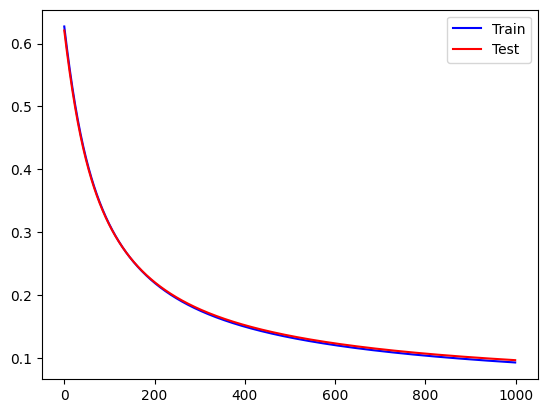

In [47]:
plt.plot(loss_train_list, 'b', label='Train')
plt.plot(loss_test_list, 'r', label='Test')
plt.legend()

In [63]:
 with torch.no_grad():

  p_train = model(input_train)
  p_train = np.round(p_train.numpy())
  acc_train = np.mean(p_train==target_train.numpy())

  p_test = model(input_test)
  p_test = np.round(p_test.numpy())
  acc_test = np.mean(p_test==target_test.numpy())


  print(f'Train Accuracy: {acc_train}, Test Accuracy: {acc_test}')

Train Accuracy: 0.989501312335958, Test Accuracy: 0.973404255319149
